<a href="https://colab.research.google.com/github/seyeon-shijuan/sesac-machine-learning/blob/master/chap4_deep_learning2/dl_02_fubao_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fubao Detector ♥

- 판다 푸바오를 검출하는 YOLOv8 모델 만들기
- 이미지에서 푸바오 검출 가능
- 영상에서 푸바오 검출 가능
- => 판다월드 CCTV를 통해 푸바오가 안전하게 잘 있는지 확인 할 수 있음

In [11]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

Found existing installation: opencv-python 4.8.0.76
Uninstalling opencv-python-4.8.0.76:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_python-4.8.0.76.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Gui-a7aedf18.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5XcbQpa-5b2d853e.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libavcodec-402e4b05.so.59.37.100
    /usr/local/lib/py

In [1]:
# !pip install roboflow
# !pip install ultralytics

from roboflow import Roboflow
from ultralytics import YOLO
import cv2

In [8]:
from google.colab.patches import cv2_imshow
import cv2

### Data

In [3]:
API_KEY = ""
rf = Roboflow(api_key=API_KEY)
project = rf.workspace("det").project("panda_person")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.232, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to panda_person-1 in yolov8:: 100%|██████████| 1618/1618 [00:00<00:00, 5125.44it/s]


### Train

In [4]:
# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="panda_person-1/data.yaml", epochs=50)  # train the model

100%|██████████| 6.23M/6.23M [00:00<00:00, 100MB/s]


Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=panda_person-1/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

100%|██████████| 755k/755k [00:00<00:00, 22.7MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/panda_person-1/train/labels... 484 images, 0 backgrounds, 0 corrupt: 100%|██████████| 484/484 [00:00<00:00, 1939.99it/s]

train: New cache created: /content/panda_person-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/panda_person-1/valid/labels... 163 images, 0 backgrounds, 0 corrupt: 100%|██████████| 163/163 [00:00<00:00, 941.86it/s] 

val: New cache created: /content/panda_person-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.46G      1.101       2.28      1.373         12        640: 100%|██████████| 31/31 [00:14<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.79it/s]

                   all        163        330      0.855      0.188      0.481      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.22G      1.171      1.819      1.419         13        640: 100%|██████████| 31/31 [00:10<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all        163        330      0.652     0.0936     0.0705      0.022



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.33G      1.346      1.931      1.535         16        640: 100%|██████████| 31/31 [00:10<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]

                   all        163        330      0.735      0.311      0.303      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.34G      1.254      1.684      1.453         24        640: 100%|██████████| 31/31 [00:12<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]

                   all        163        330      0.342       0.45      0.307       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.31G      1.254      1.575      1.455         11        640: 100%|██████████| 31/31 [00:12<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]


                   all        163        330       0.36      0.495       0.42      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.21G      1.274      1.617       1.49         13        640: 100%|██████████| 31/31 [00:14<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]

                   all        163        330      0.596      0.389      0.485       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.31G      1.262      1.563      1.499          8        640: 100%|██████████| 31/31 [00:11<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]


                   all        163        330      0.486       0.41      0.425      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.33G      1.215      1.506      1.434         33        640: 100%|██████████| 31/31 [00:11<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.87it/s]


                   all        163        330      0.556      0.551      0.543      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.22G      1.176      1.397      1.424         21        640: 100%|██████████| 31/31 [00:10<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.79it/s]

                   all        163        330      0.541      0.465      0.467      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.33G      1.224      1.409      1.472         10        640: 100%|██████████| 31/31 [00:10<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.88it/s]

                   all        163        330      0.581      0.451      0.481       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.3G      1.145      1.306      1.379         26        640: 100%|██████████| 31/31 [00:10<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.81it/s]

                   all        163        330      0.626       0.53      0.536      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.34G      1.166      1.336      1.394         16        640: 100%|██████████| 31/31 [00:10<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.94it/s]

                   all        163        330      0.773      0.479      0.536        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.33G      1.176      1.279      1.422         10        640: 100%|██████████| 31/31 [00:10<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.38it/s]

                   all        163        330      0.572      0.449      0.479      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.31G      1.134       1.24        1.4          8        640: 100%|██████████| 31/31 [00:09<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]

                   all        163        330      0.658      0.656      0.676      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.33G      1.085      1.203      1.366         11        640: 100%|██████████| 31/31 [00:08<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]


                   all        163        330      0.557      0.488       0.54      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.33G      1.072      1.145      1.347         18        640: 100%|██████████| 31/31 [00:08<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]


                   all        163        330      0.632      0.614      0.606      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.33G      1.072      1.083      1.345         10        640: 100%|██████████| 31/31 [00:09<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]


                   all        163        330      0.624      0.578      0.599      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.34G      1.044      1.118      1.346         18        640: 100%|██████████| 31/31 [00:10<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.90it/s]

                   all        163        330      0.823      0.577      0.676      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.31G      1.075      1.091      1.339         14        640: 100%|██████████| 31/31 [00:10<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.94it/s]

                   all        163        330      0.688      0.669      0.701      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.31G     0.9948      1.024      1.315         13        640: 100%|██████████| 31/31 [00:10<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.16it/s]

                   all        163        330      0.542      0.575      0.564      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.33G      1.001      1.017      1.299         14        640: 100%|██████████| 31/31 [00:10<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.90it/s]

                   all        163        330      0.775      0.525      0.612       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.31G     0.9876     0.9988      1.315         16        640: 100%|██████████| 31/31 [00:10<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.85it/s]

                   all        163        330      0.628      0.674      0.656      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.2G     0.9597     0.9374      1.263         18        640: 100%|██████████| 31/31 [00:10<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.72it/s]

                   all        163        330      0.615      0.634      0.668      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.33G     0.9672     0.9737      1.284         13        640: 100%|██████████| 31/31 [00:10<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all        163        330      0.635      0.553      0.603      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.31G       0.95     0.9644      1.292         14        640: 100%|██████████| 31/31 [00:10<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        163        330      0.722      0.625      0.676      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.31G     0.9376     0.9105      1.254         15        640: 100%|██████████| 31/31 [00:10<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.01it/s]

                   all        163        330      0.797      0.695      0.743      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.31G     0.9515      0.936       1.27         23        640: 100%|██████████| 31/31 [00:09<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        163        330      0.645      0.709      0.682      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.34G     0.9228     0.9226       1.26          8        640: 100%|██████████| 31/31 [00:09<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        163        330      0.803      0.588      0.665      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.34G     0.8998      0.856      1.234         17        640: 100%|██████████| 31/31 [00:09<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]

                   all        163        330      0.636      0.729      0.691      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.31G     0.8973     0.8913      1.256         25        640: 100%|██████████| 31/31 [00:09<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        163        330      0.802        0.6      0.692      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.34G     0.9151     0.8886      1.246         16        640: 100%|██████████| 31/31 [00:09<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.74it/s]

                   all        163        330       0.83      0.635      0.729      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.33G     0.8715     0.8498      1.221         25        640: 100%|██████████| 31/31 [00:09<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.84it/s]

                   all        163        330       0.83      0.633       0.76      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.33G      0.863     0.8501      1.209         18        640: 100%|██████████| 31/31 [00:10<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.79it/s]

                   all        163        330      0.818      0.772      0.805      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.34G     0.8575     0.8249      1.226         21        640: 100%|██████████| 31/31 [00:10<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]

                   all        163        330      0.838      0.686      0.778      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.3G     0.8466     0.8155      1.209         16        640: 100%|██████████| 31/31 [00:10<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.87it/s]

                   all        163        330      0.773       0.75        0.8      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.33G     0.8191     0.7714      1.192         15        640: 100%|██████████| 31/31 [00:10<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.09it/s]

                   all        163        330      0.819      0.744      0.795      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.32G     0.8372     0.8441      1.207         12        640: 100%|██████████| 31/31 [00:10<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.12it/s]

                   all        163        330      0.733      0.773      0.775      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.32G     0.7995     0.7447      1.186         14        640: 100%|██████████| 31/31 [00:10<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]

                   all        163        330      0.781      0.744       0.81      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.33G     0.7665     0.7132      1.162         13        640: 100%|██████████| 31/31 [00:10<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.89it/s]

                   all        163        330      0.773      0.732      0.791       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.33G     0.8118     0.7747      1.201          6        640: 100%|██████████| 31/31 [00:10<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.98it/s]

                   all        163        330      0.864      0.699      0.807      0.548


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.29G     0.6613     0.6376      1.107          4        640: 100%|██████████| 31/31 [00:12<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.98it/s]

                   all        163        330      0.838      0.672      0.786      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.32G      0.648     0.6139      1.119          4        640: 100%|██████████| 31/31 [00:10<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.01it/s]

                   all        163        330      0.775      0.767        0.8      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       2.3G     0.6198     0.5705       1.08          7        640: 100%|██████████| 31/31 [00:09<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all        163        330      0.892      0.697      0.798      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.29G     0.6159     0.5646      1.064          8        640: 100%|██████████| 31/31 [00:08<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        163        330      0.921      0.715      0.828      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.31G     0.6007     0.5312      1.063          4        640: 100%|██████████| 31/31 [00:08<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]

                   all        163        330      0.921      0.747      0.858      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.35G     0.5766     0.5253      1.043          8        640: 100%|██████████| 31/31 [00:09<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.10it/s]

                   all        163        330      0.893      0.762      0.847      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.33G     0.5788     0.5453      1.054          4        640: 100%|██████████| 31/31 [00:09<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.90it/s]

                   all        163        330      0.933      0.714      0.844      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.29G     0.5536     0.4977      1.038          9        640: 100%|██████████| 31/31 [00:10<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.94it/s]

                   all        163        330      0.813       0.75      0.834      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       2.3G     0.5755     0.4857      1.034         11        640: 100%|██████████| 31/31 [00:10<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.88it/s]

                   all        163        330      0.842       0.75      0.834      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.29G     0.5412      0.477      1.015         19        640: 100%|██████████| 31/31 [00:10<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.31it/s]

                   all        163        330      0.844      0.764      0.832      0.592



50 epochs completed in 0.190 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]


                   all        163        330      0.889      0.764      0.846      0.603
                 panda        163        299      0.926      0.883      0.953      0.743
                person        163         31      0.851      0.645       0.74      0.462
Speed: 1.1ms preprocess, 3.3ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a6dbeb55de0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

### Predict (Image)

In [7]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
results = model('/content/baby_fubao.jpg', save=True)


image 1/1 /content/baby_fubao.jpg: 576x640 2 pandas, 13.4ms
Speed: 3.5ms preprocess, 13.4ms inference, 2.6ms postprocess per image at shape (1, 3, 576, 640)
Results saved to runs/detect/predict


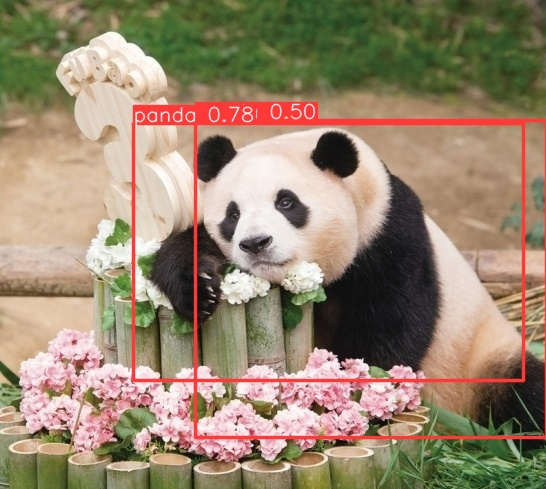

In [9]:
images='/content/runs/detect/predict/baby_fubao.jpg'
image = cv2.imread(images)
cv2_imshow(image)

### Predict (Video)

In [10]:
# Open the video file
video_path = 'fubao.mp4'
cap = cv2.VideoCapture(video_path)

# Get video properties for VideoWriter
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # or 'XVID'
out = cv2.VideoWriter('/content/output.mp4', fourcc, fps, (frame_width, frame_height))

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Write the frame into the file
        out.write(annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release everything
cap.release()
out.release()
cv2.destroyAllWindows()


0: 640x384 1 panda, 199.5ms
Speed: 13.4ms preprocess, 199.5ms inference, 14.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 panda, 10.0ms
Speed: 3.3ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 panda, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 panda, 12.3ms
Speed: 1.9ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 panda, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 panda, 9.1ms
Speed: 2.2ms preprocess, 9.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 panda, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 panda, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)

0

KeyboardInterrupt: ignored